<a href="https://colab.research.google.com/github/mitchellostrow/NM2020/blob/master/Steinmetz_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [2]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = alldat[11]
print(dat.keys())

dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])


This behavioural analysis mostly focused on the visual conditions in which left contrast and right contrast are different.

# reaction time

## sesh 11

In [3]:
# optional TODO: use 'reaction time'
# although, question: what is 'inf'?
reaction_time = dat['reaction_time'][:,0]

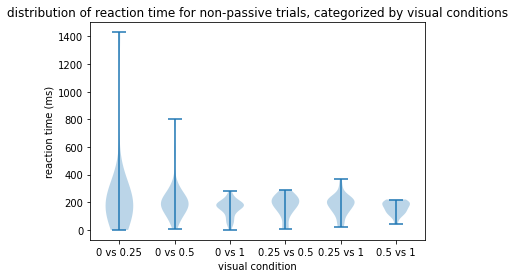

In [6]:
#@title distribution of reaction time for all non-passive trials, categorized by visual conditions
from matplotlib import pyplot as plt
response = dat['response']
vis_left = dat['contrast_left']
vis_right = dat['contrast_right']

labels=['0 vs 0.25','0 vs 0.5','0 vs 1','0.25 vs 0.5','0.25 vs 1','0.5 vs 1']

a = reaction_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0, vis_right==0.25)),
                        np.logical_and(response!=0,np.logical_and(vis_left==0.25, vis_right==0)))].squeeze()
b = reaction_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0, vis_right==0.5)),
                        np.logical_and(response!=0,np.logical_and(vis_left==0.5, vis_right==0)))].squeeze()
c = reaction_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0, vis_right==1)),
                        np.logical_and(response!=0,np.logical_and(vis_left==1, vis_right==0)))].squeeze()
d = reaction_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0.25, vis_right==0.5)),
                        np.logical_and(response!=0,np.logical_and(vis_left==0.5, vis_right==0.25)))].squeeze()
e = reaction_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0.25, vis_right==1)),
                        np.logical_and(response!=0,np.logical_and(vis_left==1, vis_right==0.25)))].squeeze()
f = reaction_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0.5, vis_right==1)),
                        np.logical_and(response!=0,np.logical_and(vis_left==1, vis_right==0.5)))].squeeze()

to_plot = [a,b,c,d,e,f]


plt.figure()
ax = plt.subplot()
plt.violinplot(to_plot)
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(labels)
ax.set_xlabel('visual condition')
ax.set_ylabel('reaction time (ms)')
ax.set_title('distribution of reaction time for non-passive trials, categorized by visual conditions')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


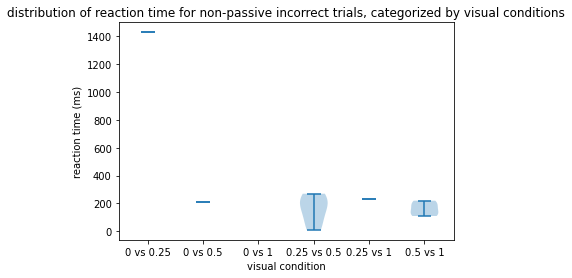

In [17]:
#@title distribution of reaction time for non-passive incorrect trials, categorized by visual conditions
a = reaction_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==0.25)),
                        np.logical_and(response==-1,np.logical_and(vis_left==0.25, vis_right==0)))]
b = reaction_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==0.5)),
                        np.logical_and(response==-1,np.logical_and(vis_left==0.5, vis_right==0)))]
c = reaction_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==1)),
                        np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0)))]
d = reaction_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0.25, vis_right==0.5)),
                        np.logical_and(response==-1,np.logical_and(vis_left==0.5, vis_right==0.25)))]
e = reaction_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0.25, vis_right==1)),
                        np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0.25)))]
f = reaction_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0.5, vis_right==1)),
                        np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0.5)))]
nans =np.empty(3) * np.nan
to_plot=[a,b,c,d,e,f]
for idx in range(len(to_plot)):
  if to_plot[idx].size==0:
    to_plot[idx]=nans

plt.figure()
ax = plt.subplot()
plt.violinplot(to_plot)
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(labels)
ax.set_xlabel('visual condition')
ax.set_ylabel('reaction time (ms)')
ax.set_title('distribution of reaction time for non-passive incorrect trials, categorized by visual conditions')
plt.show()

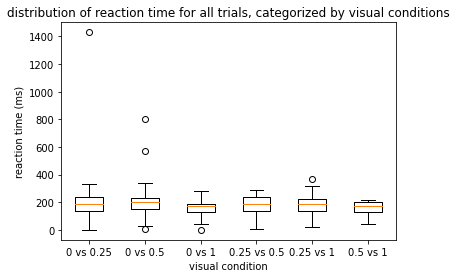

In [33]:
#@title distribution of reaction time for all trials, categorized by visual conditions (box)
a = reaction_time[np.logical_or(np.logical_and(vis_left==0, vis_right==0.25),np.logical_and(vis_left==0.25, vis_right==0))].squeeze()
b = reaction_time[np.logical_or(np.logical_and(vis_left==0, vis_right==0.5),np.logical_and(vis_left==0.5, vis_right==0))].squeeze()
c = reaction_time[np.logical_or(np.logical_and(vis_left==0, vis_right==1),np.logical_and(vis_left==1, vis_right==0))].squeeze()
d = reaction_time[np.logical_or(np.logical_and(vis_left==0.25, vis_right==0.5),np.logical_and(vis_left==0.5, vis_right==0.25))].squeeze()
e = reaction_time[np.logical_or(np.logical_and(vis_left==0.25, vis_right==1),np.logical_and(vis_left==1, vis_right==0.25))].squeeze()
f = reaction_time[np.logical_or(np.logical_and(vis_left==0.5, vis_right==1),np.logical_and(vis_left==1, vis_right==0.5))].squeeze()
pinf = float('+inf')
a=a[a!=pinf]
b=b[b!=pinf]
c=c[c!=pinf]
d=d[d!=pinf]
e=e[e!=pinf]
f=f[f!=pinf]
to_plot = [a,b,c,d,e,f]

fig, ax = plt.subplots()
bp = plt.boxplot(to_plot,vert=True,labels=labels)
ax.set_xlabel('visual condition')
ax.set_ylabel('reaction time (ms)')
ax.set_title('distribution of reaction time for all trials, categorized by visual conditions')
plt.show()

## all sesh

In [9]:
combined_response_time = alldat[0]['response_time']
for i in range(1,len(alldat)):
  combined_response_time = np.vstack((combined_response_time,alldat[i]['response_time']))

combined_vis_left = alldat[0]['contrast_left']
for i in range(1,len(alldat)):
  combined_vis_left = np.hstack((combined_vis_left,alldat[i]['contrast_left']))

combined_vis_right = alldat[0]['contrast_right']
for i in range(1,len(alldat)):
  combined_vis_right = np.hstack((combined_vis_right,alldat[i]['contrast_right']))

combined_gocue = alldat[0]['gocue']
for i in range(1,len(alldat)):
  combined_gocue = np.vstack((combined_gocue,alldat[i]['gocue']))

combined_response = alldat[0]['response']
for i in range(1,len(alldat)):
  combined_response = np.hstack((combined_response,alldat[i]['response']))

combined_reaction_time = alldat[0]['reaction_time'][:,0]
for i in range(1,len(alldat)):
  combined_reaction_time = np.hstack((combined_reaction_time,alldat[i]['reaction_time'][:,0]))

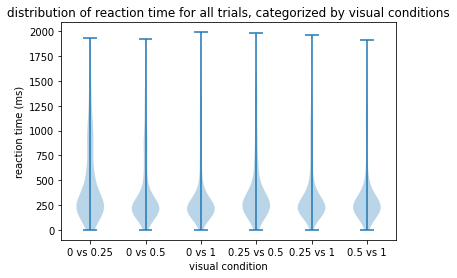

In [31]:
#@title distribution of reaction time for all trials, categorized by visual conditions
a = combined_reaction_time[np.logical_or(np.logical_and(combined_vis_left==0, combined_vis_right==0.25),np.logical_and(combined_vis_left==0.25, combined_vis_right==0))].squeeze()
b = combined_reaction_time[np.logical_or(np.logical_and(combined_vis_left==0, combined_vis_right==0.5),np.logical_and(combined_vis_left==0.5, combined_vis_right==0))].squeeze()
c = combined_reaction_time[np.logical_or(np.logical_and(combined_vis_left==0, combined_vis_right==1),np.logical_and(combined_vis_left==1, combined_vis_right==0))].squeeze()
d = combined_reaction_time[np.logical_or(np.logical_and(combined_vis_left==0.25, combined_vis_right==0.5),np.logical_and(combined_vis_left==0.5, combined_vis_right==0.25))].squeeze()
e = combined_reaction_time[np.logical_or(np.logical_and(combined_vis_left==0.25, combined_vis_right==1),np.logical_and(combined_vis_left==1, combined_vis_right==0.25))].squeeze()
f = combined_reaction_time[np.logical_or(np.logical_and(combined_vis_left==0.5, combined_vis_right==1),np.logical_and(combined_vis_left==1, combined_vis_right==0.5))].squeeze()
pinf = float('+inf')
a=a[a!=pinf]
b=b[b!=pinf]
c=c[c!=pinf]
d=d[d!=pinf]
e=e[e!=pinf]
f=f[f!=pinf]
to_plot = [a,b,c,d,e,f]
plt.figure()
ax = plt.subplot()
plt.violinplot(to_plot)
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(labels)
ax.set_xlabel('visual condition')
ax.set_ylabel('reaction time (ms)')
ax.set_title('distribution of reaction time for all trials, categorized by visual conditions')
plt.show()

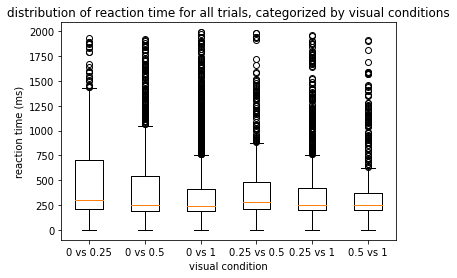

In [32]:
#@title distribution of reaction time for all trials, categorized by visual conditions (box)
a = combined_reaction_time[np.logical_or(np.logical_and(combined_vis_left==0, combined_vis_right==0.25),np.logical_and(combined_vis_left==0.25, combined_vis_right==0))].squeeze()
b = combined_reaction_time[np.logical_or(np.logical_and(combined_vis_left==0, combined_vis_right==0.5),np.logical_and(combined_vis_left==0.5, combined_vis_right==0))].squeeze()
c = combined_reaction_time[np.logical_or(np.logical_and(combined_vis_left==0, combined_vis_right==1),np.logical_and(combined_vis_left==1, combined_vis_right==0))].squeeze()
d = combined_reaction_time[np.logical_or(np.logical_and(combined_vis_left==0.25, combined_vis_right==0.5),np.logical_and(combined_vis_left==0.5, combined_vis_right==0.25))].squeeze()
e = combined_reaction_time[np.logical_or(np.logical_and(combined_vis_left==0.25, combined_vis_right==1),np.logical_and(combined_vis_left==1, combined_vis_right==0.25))].squeeze()
f = combined_reaction_time[np.logical_or(np.logical_and(combined_vis_left==0.5, combined_vis_right==1),np.logical_and(combined_vis_left==1, combined_vis_right==0.5))].squeeze()
pinf = float('+inf')
a=a[a!=pinf]
b=b[b!=pinf]
c=c[c!=pinf]
d=d[d!=pinf]
e=e[e!=pinf]
f=f[f!=pinf]
to_plot = [a,b,c,d,e,f]
fig, ax = plt.subplots()
bp = plt.boxplot(to_plot,vert=True,labels=labels)
ax.set_xlabel('visual condition')
ax.set_ylabel('reaction time (ms)')
ax.set_title('distribution of reaction time for all trials, categorized by visual conditions')
plt.show()

#session 11

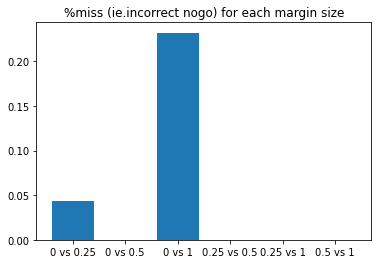

In [ ]:
#@title %miss (ie.incorrect nogo) for each margin size
from matplotlib import pyplot as plt
response = dat['response']
vis_left = dat['contrast_left']
vis_right = dat['contrast_right']

total_dict = {
    '0 vs 0.25': np.sum(np.logical_or(np.logical_and(vis_left==0, vis_right==0.25), 
                               np.logical_and(vis_left==0.25, vis_right==0))),
    '0 vs 0.5':np.sum(np.logical_or(np.logical_and(vis_left==0, vis_right==0.5), 
                               np.logical_and(vis_left==0.5, vis_right==0))),
    '0 vs 1':np.sum(np.logical_or(np.logical_and(vis_left==0, vis_right==1), 
                               np.logical_and(vis_left==1, vis_right==0))),
    '0.25 vs 0.5':np.sum(np.logical_or(np.logical_and(vis_left==0.25, vis_right==0.5), 
                               np.logical_and(vis_left==0.5, vis_right==0.25))),
    '0.25 vs 1':np.sum(np.logical_or(np.logical_and(vis_left==0.25, vis_right==1), 
                               np.logical_and(vis_left==1, vis_right==0.25))),
    '0.5 vs 1':np.sum(np.logical_or(np.logical_and(vis_left==0.5, vis_right==1), 
                               np.logical_and(vis_left==1, vis_right==0.5))),
}

inc_go_dict = [
    np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==0.25)).sum() + np.logical_and(response==-1,np.logical_and(vis_left==0.25, vis_right==0)).sum(),
    np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==0.5)).sum() + np.logical_and(response==-1,np.logical_and(vis_left==0.5, vis_right==0)).sum(),
    np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==1)).sum() + np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0)).sum(),
    np.logical_and(response==1,np.logical_and(vis_left==0.25, vis_right==0.5)).sum() + np.logical_and(response==-1,np.logical_and(vis_left==0.5, vis_right==0.25)).sum(),
    np.logical_and(response==1,np.logical_and(vis_left==0.25, vis_right==1)).sum() + np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0.25)).sum(),
    np.logical_and(response==1,np.logical_and(vis_left==0.5, vis_right==1)).sum() + np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0.5)).sum()
]

miss_dict = [
    np.logical_and(response==0,np.logical_and(vis_left==0, vis_right==0.25)).sum() + np.logical_and(response==0,np.logical_and(vis_left==0.25, vis_right==0)).sum(),
    np.logical_and(response==0,np.logical_and(vis_left==0, vis_right==0.5)).sum() + np.logical_and(response==0,np.logical_and(vis_left==0.5, vis_right==0)).sum(),
    np.logical_and(response==0,np.logical_and(vis_left==0, vis_right==1)).sum() + np.logical_and(response==0,np.logical_and(vis_left==1, vis_right==0)).sum(),
    np.logical_and(response==0,np.logical_and(vis_left==0.25, vis_right==0.5)).sum() + np.logical_and(response==0,np.logical_and(vis_left==0.5, vis_right==0.25)).sum(),
    np.logical_and(response==0,np.logical_and(vis_left==0.25, vis_right==1)).sum() + np.logical_and(response==0,np.logical_and(vis_left==1, vis_right==0.25)).sum(),
    np.logical_and(response==0,np.logical_and(vis_left==0.5, vis_right==1)).sum() + np.logical_and(response==0,np.logical_and(vis_left==1, vis_right==0.5)).sum()
]
x = list(total_dict.keys())
heights = [
           miss_dict[0] / total_dict['0 vs 0.25'],
           miss_dict[1] / total_dict['0 vs 0.5'],
           miss_dict[2] / total_dict['0 vs 1'],
           miss_dict[3] / total_dict['0.25 vs 0.5'],
           miss_dict[4] / total_dict['0.25 vs 1'],
           miss_dict[5] / total_dict['0.5 vs 1']
           ]
plt.figure()
plt.bar(x,heights)
plt.title('%miss (ie.incorrect nogo) for each margin size')
plt.show()

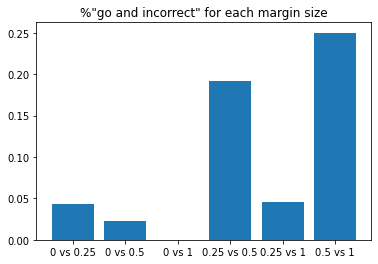

In [ ]:
#@title %"go and incorrect" for each margin size
x = list(total_dict.keys())
heights = [
           inc_go_dict[0] / total_dict['0 vs 0.25'],
           inc_go_dict[1] / total_dict['0 vs 0.5'],
           inc_go_dict[2] / total_dict['0 vs 1'],
           inc_go_dict[3] / total_dict['0.25 vs 0.5'],
           inc_go_dict[4] / total_dict['0.25 vs 1'],
           inc_go_dict[5] / total_dict['0.5 vs 1']
           ]
plt.figure()
plt.bar(x,heights)
plt.title('%"go and incorrect" for each margin size')
plt.show()

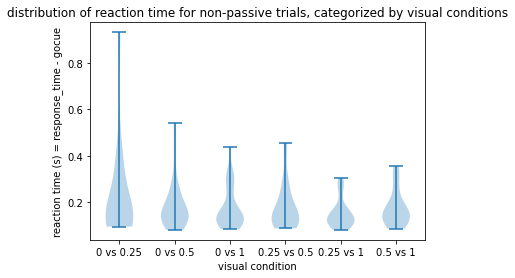

In [ ]:
#@title distribution of reaction time for all non-passive trials, categorized by visual conditions
react_time = dat['response_time'] - dat['gocue']
a = react_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0, vis_right==0.25)),
                        np.logical_and(response!=0,np.logical_and(vis_left==0.25, vis_right==0)))].squeeze()
b = react_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0, vis_right==0.5)),
                        np.logical_and(response!=0,np.logical_and(vis_left==0.5, vis_right==0)))].squeeze()
c = react_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0, vis_right==1)),
                        np.logical_and(response!=0,np.logical_and(vis_left==1, vis_right==0)))].squeeze()
d = react_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0.25, vis_right==0.5)),
                        np.logical_and(response!=0,np.logical_and(vis_left==0.5, vis_right==0.25)))].squeeze()
e = react_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0.25, vis_right==1)),
                        np.logical_and(response!=0,np.logical_and(vis_left==1, vis_right==0.25)))].squeeze()
f = react_time[np.logical_or(
                        np.logical_and(response!=0,np.logical_and(vis_left==0.5, vis_right==1)),
                        np.logical_and(response!=0,np.logical_and(vis_left==1, vis_right==0.5)))].squeeze()

to_plot = [a,b,c,d,e,f]

labels = list(total_dict.keys())

plt.figure()
ax = plt.subplot()
plt.violinplot(to_plot)
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(labels)
ax.set_xlabel('visual condition')
ax.set_ylabel('reaction time (s) = response_time - gocue')
ax.set_title('distribution of reaction time for non-passive trials, categorized by visual conditions')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


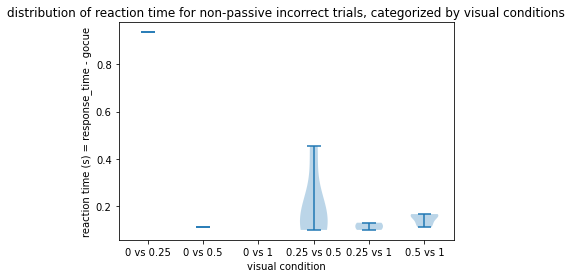

In [ ]:
#@title distribution of reaction time for non-passive incorrect trials, categorized by visual conditions
react_time = dat['response_time'] - dat['gocue']
a = react_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==0.25)),
                        np.logical_and(response==-1,np.logical_and(vis_left==0.25, vis_right==0)))]
b = react_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==0.5)),
                        np.logical_and(response==-1,np.logical_and(vis_left==0.5, vis_right==0)))]
c = react_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0, vis_right==1)),
                        np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0)))]
d = react_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0.25, vis_right==0.5)),
                        np.logical_and(response==-1,np.logical_and(vis_left==0.5, vis_right==0.25)))]
e = react_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0.25, vis_right==1)),
                        np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0.25)))]
f = react_time[np.logical_or(
                        np.logical_and(response==1,np.logical_and(vis_left==0.5, vis_right==1)),
                        np.logical_and(response==-1,np.logical_and(vis_left==1, vis_right==0.5)))]
nans =np.empty(3) * np.nan
to_plot=[a,b,c,d,e,f]
for idx in range(len(to_plot)):
  if to_plot[idx].size==0:
    to_plot[idx]=nans

labels = list(total_dict.keys())

plt.figure()
ax = plt.subplot()
plt.violinplot(to_plot)
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(labels)
ax.set_xlabel('visual condition')
ax.set_ylabel('reaction time (s) = response_time - gocue')
ax.set_title('distribution of reaction time for non-passive incorrect trials, categorized by visual conditions')
plt.show()

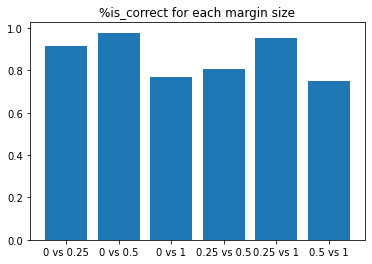

In [ ]:
#@title %is_correct for each margin size
cor_dict = [
    np.logical_and(response==-1,np.logical_and(vis_left==0, vis_right==0.25)).sum() + np.logical_and(response==1,np.logical_and(vis_left==0.25, vis_right==0)).sum(),
    np.logical_and(response==-1,np.logical_and(vis_left==0, vis_right==0.5)).sum() + np.logical_and(response==1,np.logical_and(vis_left==0.5, vis_right==0)).sum(),
    np.logical_and(response==-1,np.logical_and(vis_left==0, vis_right==1)).sum() + np.logical_and(response==1,np.logical_and(vis_left==1, vis_right==0)).sum(),
    np.logical_and(response==-1,np.logical_and(vis_left==0.25, vis_right==0.5)).sum() + np.logical_and(response==1,np.logical_and(vis_left==0.5, vis_right==0.25)).sum(),
    np.logical_and(response==-1,np.logical_and(vis_left==0.25, vis_right==1)).sum() + np.logical_and(response==1,np.logical_and(vis_left==1, vis_right==0.25)).sum(),
    np.logical_and(response==-1,np.logical_and(vis_left==0.5, vis_right==1)).sum() + np.logical_and(response==1,np.logical_and(vis_left==1, vis_right==0.5)).sum()
]

x = list(total_dict.keys())
heights = [
           cor_dict[0] / total_dict['0 vs 0.25'],
           cor_dict[1] / total_dict['0 vs 0.5'],
           cor_dict[2] / total_dict['0 vs 1'],
           cor_dict[3] / total_dict['0.25 vs 0.5'],
           cor_dict[4] / total_dict['0.25 vs 1'],
           cor_dict[5] / total_dict['0.5 vs 1']
           ]
plt.figure()
plt.bar(x,heights)
plt.title('%is_correct for each margin size')
plt.show()

In [ ]:
#@title 3x2x2 contingency table analysis
# three way analysis: correct/incorrect/miss, slow/fast response, small/large margin
from scipy.stats import chi2_contingency
is_correct = np.logical_and(np.sign(response)==np.sign(vis_left-vis_right),response != 0,
                            np.sign(vis_left - vis_right) != 0)
is_miss = np.logical_and(response == 0,np.sign(vis_left - vis_right) != 0)
is_incorrect = np.logical_and(np.sign(response)==np.sign(vis_right-vis_left),response != 0,
                            np.sign(vis_left - vis_right) != 0)

is_large_margin = np.abs(vis_left-vis_right) >= 0.5

is_slow_resp = dat['response_time'] > np.mean(dat['response_time'])
is_slow_resp.squeeze()
is_slow_resp = is_slow_resp.reshape(is_slow_resp.shape[0])

contingency = np.array([
                        [[np.sum(np.logical_and(np.logical_and(is_correct, is_large_margin), is_slow_resp)), np.sum(np.logical_and(np.logical_and(is_correct, is_large_margin), ~is_slow_resp))],
                         [np.sum(np.logical_and(np.logical_and(is_correct, ~is_large_margin), is_slow_resp)), np.sum(np.logical_and(np.logical_and(is_correct, ~is_large_margin), ~is_slow_resp))]], # correct
                        [[np.sum(np.logical_and(np.logical_and(is_incorrect, is_large_margin), is_slow_resp)), np.sum(np.logical_and(np.logical_and(is_incorrect, is_large_margin), ~is_slow_resp))],
                        [np.sum(np.logical_and(np.logical_and(is_incorrect, ~is_large_margin), is_slow_resp)), np.sum(np.logical_and(np.logical_and(is_incorrect, ~is_large_margin), ~is_slow_resp))]], # incorrect
                        [[np.sum(np.logical_and(np.logical_and(is_miss, is_large_margin), is_slow_resp)), np.sum(np.logical_and(np.logical_and(is_miss, is_large_margin), ~is_slow_resp))],
                        [np.sum(np.logical_and(np.logical_and(is_miss, ~is_large_margin), is_slow_resp)), np.sum(np.logical_and(np.logical_and(is_miss, ~is_large_margin), ~is_slow_resp))]]  # miss
])
print(contingency)
chi2_contingency(contingency)

[[[  6 138]
  [  1  41]]

 [[  0   8]
  [  1   5]]

 [[ 13   0]
  [  1   0]]]


(154.3347759504711,
 4.985983363916328e-30,
 7,
 array([[[ 14.74320901, 128.66800594],
         [  4.37828631,  38.21049873]],
 
        [[  1.1097039 ,   9.68468862],
         [  0.32954843,   2.87605904]],
 
        [[  1.1097039 ,   9.68468862],
         [  0.32954843,   2.87605904]]]))

contingency table suggests that there are significant correlation between the three variables.

#all sessions

In [ ]:
combined_response_time = alldat[0]['response_time']
for i in range(1,len(alldat)):
  combined_response_time = np.vstack((combined_response_time,alldat[i]['response_time']))

combined_vis_left = alldat[0]['contrast_left']
for i in range(1,len(alldat)):
  combined_vis_left = np.hstack((combined_vis_left,alldat[i]['contrast_left']))

combined_vis_right = alldat[0]['contrast_right']
for i in range(1,len(alldat)):
  combined_vis_right = np.hstack((combined_vis_right,alldat[i]['contrast_right']))

combined_gocue = alldat[0]['gocue']
for i in range(1,len(alldat)):
  combined_gocue = np.vstack((combined_gocue,alldat[i]['gocue']))

combined_response = alldat[0]['response']
for i in range(1,len(alldat)):
  combined_response = np.hstack((combined_response,alldat[i]['response']))

combined_react_time = combined_response_time - combined_gocue

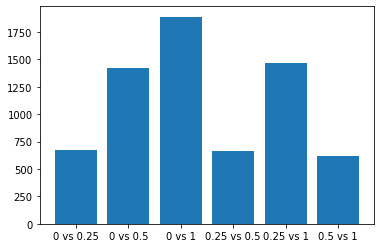

In [ ]:
#@title categorize all CR=/= CL trials by margin size
from matplotlib import pyplot as plt
total_dict = {
    '0 vs 0.25': np.sum(np.logical_or(np.logical_and(combined_vis_left==0, combined_vis_right==0.25), 
                               np.logical_and(combined_vis_left==0.25, combined_vis_right==0))),
    '0 vs 0.5':np.sum(np.logical_or(np.logical_and(combined_vis_left==0, combined_vis_right==0.5), 
                               np.logical_and(combined_vis_left==0.5, combined_vis_right==0))),
    '0 vs 1':np.sum(np.logical_or(np.logical_and(combined_vis_left==0, combined_vis_right==1), 
                               np.logical_and(combined_vis_left==1, combined_vis_right==0))),
    '0.25 vs 0.5':np.sum(np.logical_or(np.logical_and(combined_vis_left==0.25, combined_vis_right==0.5), 
                               np.logical_and(combined_vis_left==0.5, combined_vis_right==0.25))),
    '0.25 vs 1':np.sum(np.logical_or(np.logical_and(combined_vis_left==0.25, combined_vis_right==1), 
                               np.logical_and(combined_vis_left==1, combined_vis_right==0.25))),
    '0.5 vs 1':np.sum(np.logical_or(np.logical_and(combined_vis_left==0.5, combined_vis_right==1), 
                               np.logical_and(combined_vis_left==1, combined_vis_right==0.5))),
}
x = list(total_dict.keys())
heights = list(total_dict.values())
plt.figure()
plt.bar(x,heights)
plt.show()

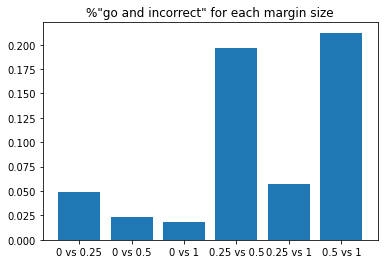

In [ ]:
#@title categorize all CR=/=CL trials by %incorrect

inc_go_dict = [
    np.logical_and(combined_response==1,np.logical_and(combined_vis_left==0, combined_vis_right==0.25)).sum() + np.logical_and(combined_response==-1,np.logical_and(combined_vis_left==0.25, combined_vis_right==0)).sum(),
    np.logical_and(combined_response==1,np.logical_and(combined_vis_left==0, combined_vis_right==0.5)).sum() + np.logical_and(combined_response==-1,np.logical_and(combined_vis_left==0.5, combined_vis_right==0)).sum(),
    np.logical_and(combined_response==1,np.logical_and(combined_vis_left==0, combined_vis_right==1)).sum() + np.logical_and(combined_response==-1,np.logical_and(combined_vis_left==1, combined_vis_right==0)).sum(),
    np.logical_and(combined_response==1,np.logical_and(combined_vis_left==0.25, combined_vis_right==0.5)).sum() + np.logical_and(combined_response==-1,np.logical_and(combined_vis_left==0.5, combined_vis_right==0.25)).sum(),
    np.logical_and(combined_response==1,np.logical_and(combined_vis_left==0.25, combined_vis_right==1)).sum() + np.logical_and(combined_response==-1,np.logical_and(combined_vis_left==1, combined_vis_right==0.25)).sum(),
    np.logical_and(combined_response==1,np.logical_and(combined_vis_left==0.5, combined_vis_right==1)).sum() + np.logical_and(combined_response==-1,np.logical_and(combined_vis_left==1, combined_vis_right==0.5)).sum()
]
x = list(total_dict.keys())
heights = [
           inc_go_dict[0] / total_dict['0 vs 0.25'],
           inc_go_dict[1] / total_dict['0 vs 0.5'],
           inc_go_dict[2] / total_dict['0 vs 1'],
           inc_go_dict[3] / total_dict['0.25 vs 0.5'],
           inc_go_dict[4] / total_dict['0.25 vs 1'],
           inc_go_dict[5] / total_dict['0.5 vs 1']
           ]
plt.figure()
plt.bar(x,heights)
plt.title('%"go and incorrect" for each margin size')
plt.show()

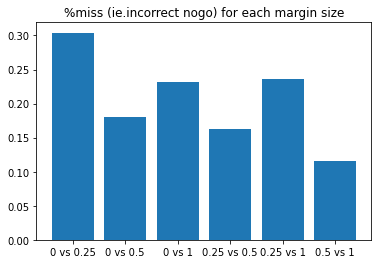

In [ ]:
#@title categorize all CR=/=CL trials by %miss

miss_dict = [
    np.logical_and(combined_response==0,np.logical_and(combined_vis_left==0, combined_vis_right==0.25)).sum() + np.logical_and(combined_response==0,np.logical_and(combined_vis_left==0.25, combined_vis_right==0)).sum(),
    np.logical_and(combined_response==0,np.logical_and(combined_vis_left==0, combined_vis_right==0.5)).sum() + np.logical_and(combined_response==0,np.logical_and(combined_vis_left==0.5, combined_vis_right==0)).sum(),
    np.logical_and(combined_response==0,np.logical_and(combined_vis_left==0, combined_vis_right==1)).sum() + np.logical_and(combined_response==0,np.logical_and(combined_vis_left==1, combined_vis_right==0)).sum(),
    np.logical_and(combined_response==0,np.logical_and(combined_vis_left==0.25, combined_vis_right==0.5)).sum() + np.logical_and(combined_response==0,np.logical_and(combined_vis_left==0.5, combined_vis_right==0.25)).sum(),
    np.logical_and(combined_response==0,np.logical_and(combined_vis_left==0.25, combined_vis_right==1)).sum() + np.logical_and(combined_response==0,np.logical_and(combined_vis_left==1, combined_vis_right==0.25)).sum(),
    np.logical_and(combined_response==0,np.logical_and(combined_vis_left==0.5, combined_vis_right==1)).sum() + np.logical_and(combined_response==0,np.logical_and(combined_vis_left==1, combined_vis_right==0.5)).sum()
]
x = list(total_dict.keys())
heights = [
           miss_dict[0] / total_dict['0 vs 0.25'],
           miss_dict[1] / total_dict['0 vs 0.5'],
           miss_dict[2] / total_dict['0 vs 1'],
           miss_dict[3] / total_dict['0.25 vs 0.5'],
           miss_dict[4] / total_dict['0.25 vs 1'],
           miss_dict[5] / total_dict['0.5 vs 1']
           ]
plt.figure()
plt.bar(x,heights)
plt.title('%miss (ie.incorrect nogo) for each margin size')
plt.show()


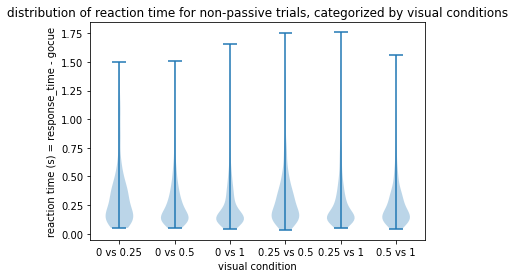

In [ ]:
#@title distribution of reaction time for all non-passive trials, categorized by visual conditions
a = combined_react_time[np.logical_or(
                        np.logical_and(combined_response!=0,np.logical_and(combined_vis_left==0, combined_vis_right==0.25)),
                        np.logical_and(combined_response!=0,np.logical_and(combined_vis_left==0.25, combined_vis_right==0)))].squeeze()
b = combined_react_time[np.logical_or(
                        np.logical_and(combined_response!=0,np.logical_and(combined_vis_left==0, combined_vis_right==0.5)),
                        np.logical_and(combined_response!=0,np.logical_and(combined_vis_left==0.5, combined_vis_right==0)))].squeeze()
c = combined_react_time[np.logical_or(
                        np.logical_and(combined_response!=0,np.logical_and(combined_vis_left==0, combined_vis_right==1)),
                        np.logical_and(combined_response!=0,np.logical_and(combined_vis_left==1, combined_vis_right==0)))].squeeze()
d = combined_react_time[np.logical_or(
                        np.logical_and(combined_response!=0,np.logical_and(combined_vis_left==0.25, combined_vis_right==0.5)),
                        np.logical_and(combined_response!=0,np.logical_and(combined_vis_left==0.5, combined_vis_right==0.25)))].squeeze()
e = combined_react_time[np.logical_or(
                        np.logical_and(combined_response!=0,np.logical_and(combined_vis_left==0.25, combined_vis_right==1)),
                        np.logical_and(combined_response!=0,np.logical_and(combined_vis_left==1, combined_vis_right==0.25)))].squeeze()
f = combined_react_time[np.logical_or(
                        np.logical_and(combined_response!=0,np.logical_and(combined_vis_left==0.5, combined_vis_right==1)),
                        np.logical_and(combined_response!=0,np.logical_and(combined_vis_left==1, combined_vis_right==0.5)))].squeeze()

to_plot = [a,b,c,d,e,f]

labels = list(total_dict.keys())

plt.figure()
ax = plt.subplot()
plt.violinplot(to_plot)
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(labels)
ax.set_xlabel('visual condition')
ax.set_ylabel('reaction time (s) = response_time - gocue')
ax.set_title('distribution of reaction time for non-passive trials, categorized by visual conditions')
plt.show()

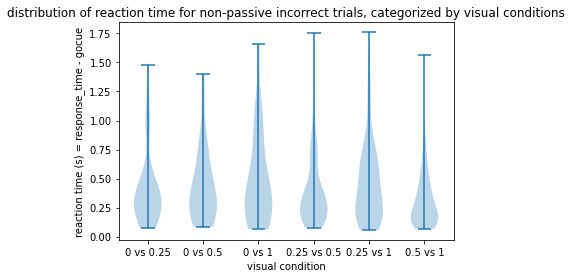

In [ ]:
#@title distribution of reaction time for non-passive incorrect trials, categorized by visual conditions
a = combined_react_time[np.logical_or(
                        np.logical_and(combined_response==1,np.logical_and(combined_vis_left==0, combined_vis_right==0.25)),
                        np.logical_and(combined_response==-1,np.logical_and(combined_vis_left==0.25, combined_vis_right==0)))].squeeze()
b = combined_react_time[np.logical_or(
                        np.logical_and(combined_response==1,np.logical_and(combined_vis_left==0, combined_vis_right==0.5)),
                        np.logical_and(combined_response==-1,np.logical_and(combined_vis_left==0.5, combined_vis_right==0)))].squeeze()
c = combined_react_time[np.logical_or(
                        np.logical_and(combined_response==1,np.logical_and(combined_vis_left==0, combined_vis_right==1)),
                        np.logical_and(combined_response==-1,np.logical_and(combined_vis_left==1, combined_vis_right==0)))].squeeze()
d = combined_react_time[np.logical_or(
                        np.logical_and(combined_response==1,np.logical_and(combined_vis_left==0.25, combined_vis_right==0.5)),
                        np.logical_and(combined_response==-1,np.logical_and(combined_vis_left==0.5, combined_vis_right==0.25)))].squeeze()
e = combined_react_time[np.logical_or(
                        np.logical_and(combined_response==1,np.logical_and(combined_vis_left==0.25, combined_vis_right==1)),
                        np.logical_and(combined_response==-1,np.logical_and(combined_vis_left==1, combined_vis_right==0.25)))].squeeze()
f = combined_react_time[np.logical_or(
                        np.logical_and(combined_response==1,np.logical_and(combined_vis_left==0.5, combined_vis_right==1)),
                        np.logical_and(combined_response==-1,np.logical_and(combined_vis_left==1, combined_vis_right==0.5)))].squeeze()

to_plot = [a,b,c,d,e,f]

labels = list(total_dict.keys())

plt.figure()
ax = plt.subplot()
plt.violinplot(to_plot)
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(labels)
ax.set_xlabel('visual condition')
ax.set_ylabel('reaction time (s) = response_time - gocue')
ax.set_title('distribution of reaction time for non-passive incorrect trials, categorized by visual conditions')
plt.show()

In [ ]:
#@title 3x2x2 contingency table analysis
# three way analysis: correct/incorrect/miss, slow/fast response, small/large margin
from scipy.stats import chi2_contingency
cb_is_correct = np.logical_and(np.logical_and(np.sign(combined_response)==np.sign(combined_vis_left-combined_vis_right),combined_response != 0),
                            np.sign(combined_vis_left - combined_vis_right) != 0)
cb_is_miss = np.logical_and(combined_response == 0,np.sign(combined_vis_left - combined_vis_right) != 0)
cb_is_incorrect = np.logical_and(np.logical_and(np.sign(combined_response)==np.sign(combined_vis_right-combined_vis_left),combined_response != 0),
                            np.sign(combined_vis_left - combined_vis_right) != 0)

cb_is_large_margin = np.abs(combined_vis_left-combined_vis_right) >= 0.5

cb_is_slow_resp = combined_response_time > np.mean(combined_response_time)
cb_is_slow_resp.squeeze()
cb_is_slow_resp = cb_is_slow_resp.reshape(cb_is_slow_resp.shape[0])

cb_contingency = np.array([
                        [[np.sum(np.logical_and(np.logical_and(cb_is_correct, cb_is_large_margin), cb_is_slow_resp)), np.sum(np.logical_and(np.logical_and(cb_is_correct, cb_is_large_margin), ~cb_is_slow_resp))],
                         [np.sum(np.logical_and(np.logical_and(cb_is_correct, ~cb_is_large_margin), cb_is_slow_resp)), np.sum(np.logical_and(np.logical_and(cb_is_correct, ~cb_is_large_margin), ~cb_is_slow_resp))]], # correct
                        [[np.sum(np.logical_and(np.logical_and(cb_is_incorrect, cb_is_large_margin), cb_is_slow_resp)), np.sum(np.logical_and(np.logical_and(cb_is_incorrect, cb_is_large_margin), ~cb_is_slow_resp))],
                        [np.sum(np.logical_and(np.logical_and(cb_is_incorrect, ~cb_is_large_margin), cb_is_slow_resp)), np.sum(np.logical_and(np.logical_and(cb_is_incorrect, ~cb_is_large_margin), ~cb_is_slow_resp))]], # incorrect
                        [[np.sum(np.logical_and(np.logical_and(cb_is_miss, cb_is_large_margin), cb_is_slow_resp)), np.sum(np.logical_and(np.logical_and(cb_is_miss, cb_is_large_margin), ~cb_is_slow_resp))],
                        [np.sum(np.logical_and(np.logical_and(cb_is_miss, ~cb_is_large_margin), cb_is_slow_resp)), np.sum(np.logical_and(np.logical_and(cb_is_miss, ~cb_is_large_margin), ~cb_is_slow_resp))]]  # miss
])
print(cb_contingency)
chi2_contingency(cb_contingency)

[[[ 322 3681]
  [  90  767]]

 [[  53  230]
  [  32  131]]

 [[1112    0]
  [ 311    0]]]


(4661.061620314571, 0.0, 7, array([[[1112.4213658 , 2786.26788966],
         [ 274.29285622,  687.01788832]],
 
        [[ 102.08640517,  255.69454296],
         [  25.17173125,   63.04732062]],
 
        [[ 325.71514476,  815.81465164],
         [  80.31249679,  201.15770681]]]))